###  Pytorch Computer Vision 

In [1]:
# Importing pytorch
import torch
from torch import nn

In [2]:
# Importing the torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Importing the matplotlib for visualizations
import matplotlib.pyplot as plt

# Checking the pytorch version
print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


### 1. Getting a dataset
The dataset i'll be using is FashionMNIST from torchvision.datasets

In [3]:
# Setting up the training data
from torchvision import datasets

# Training_data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)


In [4]:
# Testing Data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# Seeing the first training data
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_names, type(class_names)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 list)

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx, type(class_to_idx)

({'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9},
 dict)

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
# Cecking the shaoe of our image
print(f"Image Shape: {image.shape}")
print(f"Image label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28])
Image label: Ankle boot


1.2 Visulazing our data

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

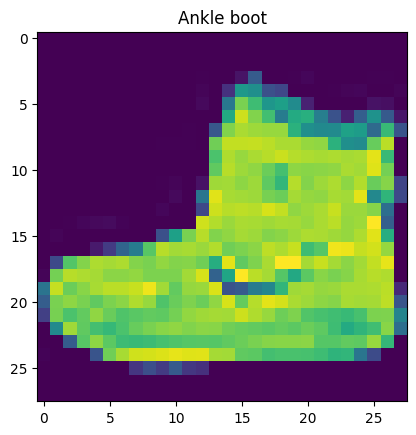

In [11]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

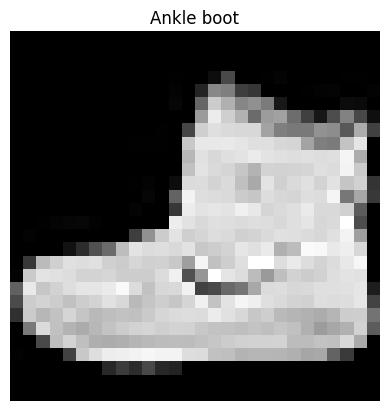

In [12]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

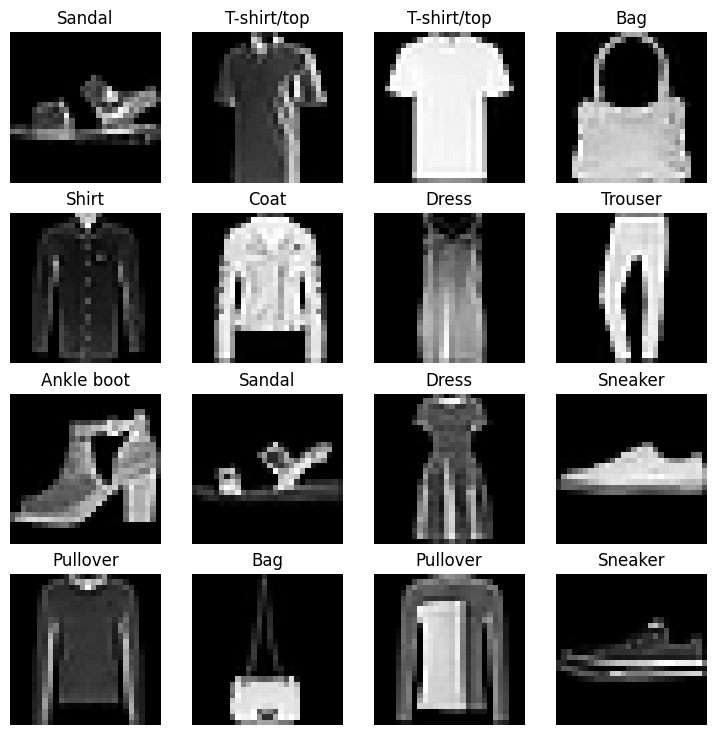

In [13]:
# Viewing the random image from the training data
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [14]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

2. Preparing the DataLoader

In [15]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turning the datasets into iterable (batches)
train_dataloader = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fe9899d3b90>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe989b26190>)

In [16]:
# Let's check out what we've created

print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fe9899d3b90>, <torch.utils.data.dataloader.DataLoader object at 0x7fe989b26190>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [17]:
# Checking out the what's inside the training dataloader
train_feature_batch, train_labels_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label : 7, shape:torch.Size([])


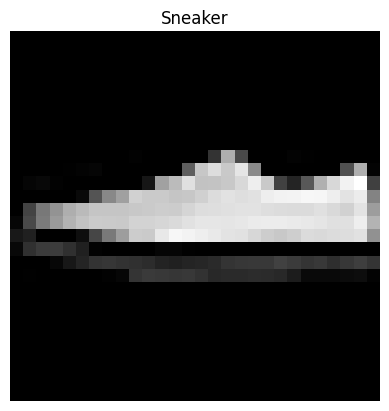

In [18]:
# Showing the samples

random_idx = torch.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label : {label}, shape:{label.shape}")

3. Model 0 : Building a baseline model

In [19]:
# Creating the flatten layer 
flatten_model = nn.Flatten()

# Geta a single sample
x = train_feature_batch[0]
print(f"The image's shape before flattening: {x.shape}")

# Flatten the sample
output = flatten_model(x)

# Printing out the shape
print(f"The image's shape after flattening: {output.shape}")

The image's shape before flattening: torch.Size([1, 28, 28])
The image's shape after flattening: torch.Size([1, 784])


### Making the model_0: Building the model with linearity and train/run on CPU.

In [20]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, 
                input_shape:int,
                hidden_unit:int,
                output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                    out_features=hidden_unit),
            nn.Linear(in_features=hidden_unit,
                    out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [21]:
# Intializing the instance of the model
torch.manual_seed(42)

# Setup the model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_unit=10,
    output_shape=len(class_names)
).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

3.1 Setup the loss function, optimizer and evaluation matrices

In [24]:
from helper_functions import accuracy_fn

# Setting up the loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

3.2 Creating a function to time our experiments


In [25]:
from timeit import default_timer as timer

def print_train_time(start:float,
                    end:float,
                    device:torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} sec.")
    return total_time

In [26]:
start_time = timer()

end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 sec.


3.839700002572499e-05

3.3 Creating the training loop and training the data in batches
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the `train loss` *per batch*.
3. Loop through testing batches, perform testing steps, calculate the `test loss` *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

**Note:** Because we are computing on *batches*, the optimizer will update the model's parameters once *per batch* rather than once per epoch.

In [27]:
# Importing the tqdm for progress bar
from tqdm.auto import tqdm

# Setting the torch seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_on_cpu = timer()

# Setting the number of epochs
epochs = 3

# creatin gthe training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n{'-' * 20}")
    
    ### Training 
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        
        y_pred = model_0(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if batch % 400 == 0:
            print(f"Looked at : {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    
    # Divide total loss by length of train dataloader
    train_loss /= len(train_dataloader)
    
    ### Testing
    test_loss, test_acc = 0.0, 0.0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            
            test_loss += loss_fn(test_pred, y_test)
            
            test_acc += accuracy_fn(y_true=y_test,
                                    y_pred=test_pred.argmax(dim=1))
            
        test_loss /= len(test_dataloader)
        
        test_acc /= len(test_dataloader)
        
    print(f"\n Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
    
    train_time_end_on_cpu = timer()
    
    total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                                end=train_time_end_on_cpu,
                                                device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------------
Looked at : 0/60000 samples.
Looked at : 12800/60000 samples.
Looked at : 25600/60000 samples.
Looked at : 38400/60000 samples.
Looked at : 51200/60000 samples.

 Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.0387
Train time on cpu: 9.645 sec.
Epoch: 1
--------------------
Looked at : 0/60000 samples.
Looked at : 12800/60000 samples.
Looked at : 25600/60000 samples.
Looked at : 38400/60000 samples.
Looked at : 51200/60000 samples.

 Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.1969
Train time on cpu: 19.555 sec.
Epoch: 2
--------------------
Looked at : 0/60000 samples.
Looked at : 12800/60000 samples.
Looked at : 25600/60000 samples.
Looked at : 38400/60000 samples.
Looked at : 51200/60000 samples.

 Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.4265
Train time on cpu: 28.594 sec.


4. Making the prediciton and get the model_0 results

In [83]:
import torch.utils
import torch.utils.data

def eval_model(model:torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                device:str,
                accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            # Make predicitons
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc+= accuracy_fn(y_true=y,
                            y_pred= y_pred.argmax(dim=1))
            
        # Scaling the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
        return {
            "model_name": model.__class__.__name__,
            "model_loss": round(loss.item()),
            "model_acc": round(acc, 4)
        }

In [84]:
# Calculate the mode_0 results on test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            device="cpu",
                            accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0, 'model_acc': 83.4265}

5. Setting up the device agnostic code

In [85]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Model 1: Making the model_1: Building the better model with non-linearity and train/run on GPU/cuda.

In [86]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
    def __init__(self, 
                input_shape:int,
                hidden_unit:int,
                output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                    out_features=hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features=hidden_unit,
                    out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x):
        return self.layer_stack(x)

In [87]:
# Create an instance of model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=28*28,
                            hidden_unit=10,
                            output_shape=len(class_names))
model_1.to(device)

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [88]:
model_1.state_dict()["layer_stack.1.weight"].device

device(type='cuda', index=0)

In [89]:
!nvidia-smi

Sat Jul 13 07:36:13 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1060        Off |   00000000:01:00.0 Off |                  N/A |
| N/A   71C    P2             26W /   88W |     163MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [90]:
# Creatung the loss/optimizer function for model_1
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [91]:
# Creating the training / testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# 1. Creating the function for training and evaluation/testing loop

def training_loop(model:torch.nn.Module,
                train_dataloader:torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                optimizer:torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device):
    
    """Performs a training with model trying to learn on data_loader"""
    ### Training
    train_loss, train_acc = 0, 0
    
    # Adding a loop of epoch to loop through training batches
    for batch, (X_train, y_train) in enumerate(train_dataloader):
        X_train, y_train = X_train.to(device), y_train.to(device)
        
        model.train()
        
        y_pred = model(X_train)
        
        loss = loss_fn(y_pred, y_train)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y_train,
                                y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        # if batch % 200 == 0:
        #     print(f"Looked at : {batch * len(X_train)}/{len(train_dataloader.dataset)} samples.")
            
    # Divide total train loss and accuracy by length of train dataloader
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    
    print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")
    

In [92]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

def testing_loop(model:torch.nn.Module,
                test_dataloader:torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                accuracy_fn,
                device: torch.device = device):
    """Performs a training with model trying to learn on data_loader"""
    ### Testing
    test_loss, test_acc = 0, 0
    
    model.eval()
    
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            test_pred = model(X_test)
            
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test,
                                    y_pred=test_pred.argmax(dim=1))
            
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

In [93]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optmization and evaluation loop using 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n{'-' * 20}")
    training_loop(model=model_1,
                train_dataloader=train_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                accuracy_fn=accuracy_fn
                )
    testing_loop(model=model_1,
                test_dataloader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                end=train_time_end_on_gpu,
                device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------------
Train loss: 1.0920 | Train acc: 61.34%
Test loss: 0.9564 | Test acc: 65.00%
Epoch: 1
--------------------
Train loss: 0.7810 | Train acc: 71.93%
Test loss: 0.7223 | Test acc: 73.91%
Epoch: 2
--------------------
Train loss: 0.6703 | Train acc: 75.94%
Test loss: 0.6850 | Test acc: 75.02%
Train time on cuda: 32.391 sec.


In [94]:
model_0_results

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0, 'model_acc': 83.4265}

In [95]:
total_train_time_model_0

28.593812168000113

In [96]:
# Get the model_1 result dict
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            device=device,
                            accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [97]:
model_1_results

{'model_name': 'FashionMNISTModelV1', 'model_loss': 1, 'model_acc': 75.02}

### Model 2: Making the CNN (Convolution Neural Network) for same dataset.

In [98]:
# Create a convolution neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, 
                    input_shape:int, 
                    hidden_units:int,
                    output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                    out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [99]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=3,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [100]:
## What's happening at the Conv@D layer
torch.manual_seed(42)

images = torch.randint(0, 257, size=(32, 3, 64, 64)).type(torch.float32)
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single test image shape: {test_image.shape}")
print(f"The test image:{test_image}")
# plt.imshow(test_images.permute(1,2,0))
# plt.axis(False)

Image batch shape: torch.Size([32, 3, 64, 64])
Single test image shape: torch.Size([3, 64, 64])
The test image:tensor([[[ 12., 149., 201.,  ...,  95.,  24.,  62.],
         [  4.,  30.,  82.,  ..., 100.,  99.,   4.],
         [ 76., 239., 190.,  ...,  40., 239., 143.],
         ...,
         [ 60., 212.,  40.,  ..., 100.,  84., 196.],
         [145., 231.,  68.,  ..., 207., 230.,  54.],
         [ 27.,  99., 122.,  ..., 176.,  39., 245.]],

        [[ 89., 166., 169.,  ..., 189.,  91., 231.],
         [ 58., 158., 250.,  ..., 120., 184., 166.],
         [158., 200., 219.,  ..., 240., 149., 145.],
         ...,
         [244.,  57., 211.,  ..., 101., 245., 227.],
         [ 97., 122., 111.,  ...,  63., 178., 149.],
         [ 81., 189., 193.,  ..., 167., 163., 172.]],

        [[149., 116., 135.,  ...,  85.,  42.,  33.],
         [ 17.,   1.,  70.,  ..., 251., 190., 192.],
         [ 60., 105., 181.,  ..., 124., 226.,  79.],
         ...,
         [ 15., 150., 233.,  ...,  63., 134.,  5

In [101]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                        out_channels=10,
                        kernel_size=(3,3),
                        stride=1,
                        padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape, conv_output


(torch.Size([1, 10, 62, 62]),
 tensor([[[[ -71.4059, -164.4705, -127.5505,  ..., -120.9398, -133.9709,
            -143.8762],
           [ -79.8398, -140.2397, -223.2600,  ...,  -83.1488, -121.6983,
             -75.5194],
           [ -91.6425, -104.2748,  -88.4451,  ...,  -60.2686, -111.4821,
             -71.8902],
           ...,
           [ -91.0756,  -63.1206, -108.0529,  ...,  -96.5549, -146.5922,
            -132.8762],
           [-134.3543, -106.2189,  -86.9931,  ...,  -61.2087, -112.7168,
            -148.4735],
           [-126.9136, -114.8051, -150.7828,  ..., -110.2519, -109.0377,
            -102.4182]],
 
          [[  48.8781,  -40.8781, -106.1508,  ...,    6.5326,  -79.5467,
              43.3469],
           [  37.3778,   -1.2736,  -54.2636,  ..., -140.8683,  -22.2292,
             -86.3301],
           [  -1.0038,   -8.7654,  -73.1584,  ...,  -53.0535,  -94.1445,
             -36.1110],
           ...,
           [  23.5476,   17.6223,   -9.5801,  ...,  -42.6058, 

Setting up the MaxPool2D layer and seeing the effect of it

In [102]:
# Print out the original image shape without unsqueezed dimensions
print(f"Test image original shape as: \n{test_image.shape}")
print(f"Test image with unsqueezed dimension: \n{test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Passing the data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape of the image after passing through conv_layer(): \n{test_image_through_conv.shape}")

# Passing the image through the max_pool layer
test_image_conv_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape of image after passing through conv_layer() and max_pool_layer : \n{test_image_conv_maxpool.shape}")

Test image original shape as: 
torch.Size([3, 64, 64])
Test image with unsqueezed dimension: 
torch.Size([1, 3, 64, 64])
Shape of the image after passing through conv_layer(): 
torch.Size([1, 10, 62, 62])
Shape of image after passing through conv_layer() and max_pool_layer : 
torch.Size([1, 10, 31, 31])


In [103]:
# Here we can see the clear picture how max_pool layer works with simple small image
torch.manual_seed(42)

test_image_small = torch.randn(size=(1, 4, 4))
test_image_small_max = max_pool_layer(test_image_small)
test_image_small, test_image_small_max

(tensor([[[ 1.9269,  1.4873,  0.9007, -2.1055],
          [ 0.6784, -1.2345, -0.0431, -1.6047],
          [-0.7521,  1.6487, -0.3925, -1.4036],
          [-0.7279, -0.5594, -0.7688,  0.7624]]]),
 tensor([[[1.9269, 0.9007],
          [1.6487, 0.7624]]]))

In [104]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [105]:
model_2(img.unsqueeze(dim=0).to(device))

tensor([[-0.0547,  0.0020, -0.0254, -0.0719,  0.0141, -0.0200,  0.0088, -0.0089,
         -0.0029,  0.0710]], device='cuda:0', grad_fn=<AddmmBackward0>)

Setting up the loss functions and optimizer for model_2

In [106]:
# Setup loss function/eval metrices/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [107]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

#### Training and testing the model_2 using the training and testing loop

In [108]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as Timer
train_time_start_model_2 = Timer()

# Train and test model

epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n {'-' * 20}")
    training_loop(model=model_2,
                train_dataloader=train_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                accuracy_fn=accuracy_fn,
                device=device)
    
    testing_loop(model=model_2,
                test_dataloader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device)

train_time_end_on_model_2 = Timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                end=train_time_end_on_gpu,
                device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
 --------------------
Train loss: 0.5610 | Train acc: 79.95%
Test loss: 0.3880 | Test acc: 86.18%
Epoch: 1
 --------------------
Train loss: 0.3597 | Train acc: 87.02%
Test loss: 0.3449 | Test acc: 87.83%
Epoch: 2
 --------------------
Train loss: 0.3218 | Train acc: 88.56%
Test loss: 0.3235 | Test acc: 88.56%
Epoch: 3
 --------------------
Train loss: 0.3010 | Train acc: 89.34%
Test loss: 0.3057 | Test acc: 88.95%
Epoch: 4
 --------------------
Train loss: 0.2873 | Train acc: 89.66%
Test loss: 0.2966 | Test acc: 89.25%
Epoch: 5
 --------------------
Train loss: 0.2782 | Train acc: 90.00%
Test loss: 0.3008 | Test acc: 89.26%
Epoch: 6
 --------------------
Train loss: 0.2718 | Train acc: 90.12%
Test loss: 0.2955 | Test acc: 89.32%
Epoch: 7
 --------------------
Train loss: 0.2679 | Train acc: 90.32%
Test loss: 0.2916 | Test acc: 89.45%
Epoch: 8
 --------------------
Train loss: 0.2620 | Train acc: 90.50%
Test loss: 0.3043 | Test acc: 89.56%
Epoch: 9
 --------------------
Train 

In [109]:
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0, 'model_acc': 88.8878}

In [110]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                            model_1_results,
                            model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0,83.4265
1,FashionMNISTModelV1,1,75.0200
2,FashionMNISTModelV2,0,88.8878


Text(0, 0.5, 'model')

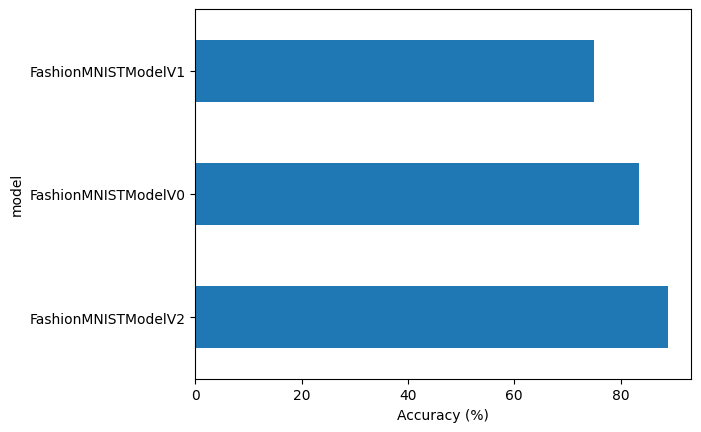

In [111]:
# Visualizing the model results
compare_results = compare_results.sort_values(by=['model_acc'], ascending=False)
compare_results.set_index('model_name')['model_acc'].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("model")

In [112]:
# Adding training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
2,FashionMNISTModelV2,0,88.8878,28.593812
0,FashionMNISTModelV0,0,83.4265,32.390629
1,FashionMNISTModelV1,1,75.0200,32.390629


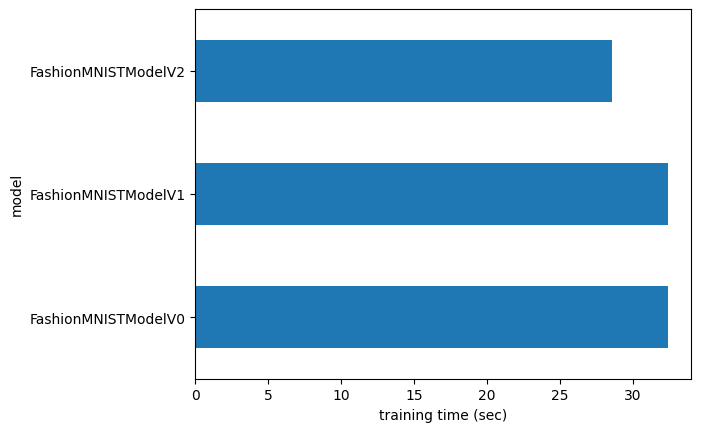

In [113]:
# Visualize our model results
compare_results = compare_results.sort_values(by=['training_time'], ascending=False)
compare_results.set_index("model_name")["training_time"].plot(kind="barh")
plt.xlabel("training time (sec)")
plt.ylabel("model");

#### Make and evluate random predicitons with best model

In [114]:
def make_predictions(model:torch.nn.Module,
                    data:list,
                    device:torch.device = device):
    pred_probs = []
    model.eval()
    
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension to pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            # Forward pass (model output)
            pred_logits = model(sample)
            
            # Get the prediciton probabilities (logits -> prediction probs)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
            
            # Get pred_probs off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
        # Stack the pred probs to turn list into a tensor
        
        return torch.stack(pred_probs)

In [115]:
image, label = next(iter(test_data))
image.shape, 

(torch.Size([1, 28, 28]),)

In [116]:
X , y = list(test_data)[0]
X.shape, y, class_names[y]

(torch.Size([1, 28, 28]), 9, 'Ankle boot')

In [117]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    # plt.imshow(sample.permute(1,2,0), cmap="gray")
    # plt.title(class_names[label])
    test_samples.append(sample)
    test_labels.append(label)

# Vuew the shape of the first test sample
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Shirt')

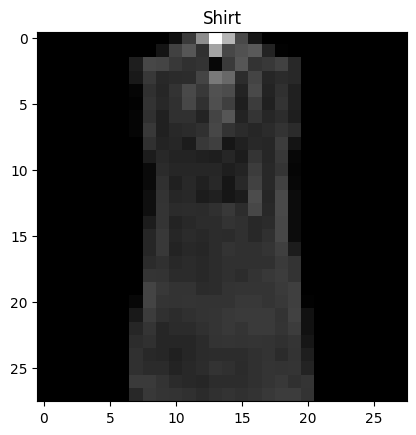

In [118]:
plt.imshow(test_samples[0].permute(1,2,0), cmap="gray")
plt.title(class_names[test_labels[0]])

In [119]:
# Make predicitons
pred_probs = make_predictions(model=model_2,
                            data=test_samples,
                            )
pred_probs[:, :6], pred_probs.argmax(dim=0), pred_probs.shape

(tensor([[6.1592e-01, 1.6383e-03, 7.9390e-03, 7.9987e-02, 1.8251e-02, 3.3542e-05],
         [3.9100e-03, 2.3321e-07, 9.2838e-02, 9.1574e-07, 7.4894e-01, 9.7296e-09],
         [4.1046e-08, 1.0476e-07, 5.9856e-09, 1.3546e-07, 3.0406e-08, 5.3774e-03],
         [9.1413e-05, 2.0890e-06, 9.5137e-01, 2.2520e-05, 4.8074e-02, 1.0517e-09],
         [1.4935e-03, 2.0993e-05, 1.0057e-03, 4.6248e-07, 9.7704e-06, 4.1952e-03],
         [2.1702e-03, 3.6828e-04, 4.5858e-02, 4.1183e-03, 9.4611e-01, 2.3221e-08],
         [8.8657e-01, 6.4564e-03, 1.1741e-02, 4.4154e-02, 3.3214e-03, 2.4729e-06],
         [1.2002e-02, 7.1840e-03, 1.4005e-02, 1.3755e-02, 1.3733e-02, 1.1411e-04],
         [4.2388e-07, 7.3966e-07, 2.8316e-07, 1.1016e-05, 4.7272e-07, 6.6456e-03]]),
 tensor([6, 7, 3, 0, 5, 8, 7, 8, 4, 2]),
 torch.Size([9, 10]))

In [120]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 4, 9, 2, 8, 4, 0, 6, 7])

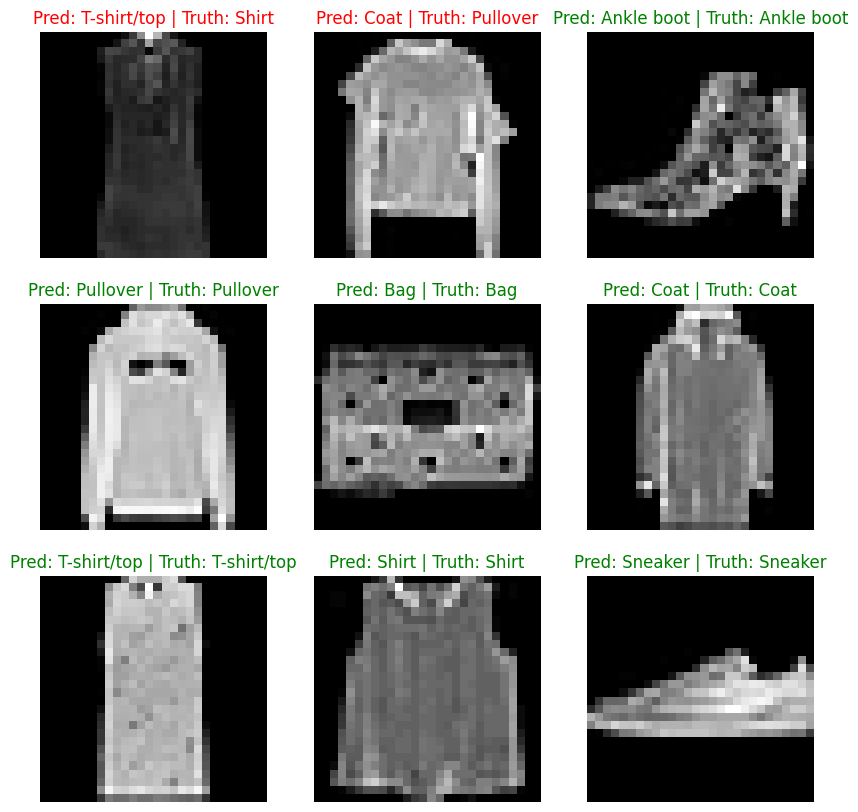

In [121]:
# Plotting the model's best predicitons with the true lables
plt.figure(figsize=(10,10))
nrows, ncols = 3, 3

for i, sample in enumerate(test_samples):
    # Create the suplot
    plt.subplot(nrows, ncols, i+1)
    
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")
    
    # Find the predicitions (in text form e.g "Sandal")
    pred_label = class_names[pred_classes[i]]
    
    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]
    
    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    
    # Check for the equality between the pred and truth and chnage the color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=12, c="g") # green text if prediciton same as truth
    else:
        plt.title(title_text, fontsize=12, c="r")
    plt.axis(False)

In [122]:
x = torch.randn(size=(1,1))
x

tensor([[0.1331]])

#### Making the confusion matrix to evaluate the model's predictions

In [123]:
# Import the tqdm.auto
from tqdm.auto import tqdm

# 1. Make the predicitons with trained model
y_preds = []
model_2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predicitons..."):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        
        # Do the forward pass
        y_logits = model_2(X)
        
        # Turn the predicitons from logits -> prediction probabilities -> predicitons labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        
        # Put the prediciton on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predicitons into a device
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predicitons...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [124]:
len(y_pred_tensor)

10000

In [125]:
import torchmetrics, mlxtend

print(f"mlxtend version: {mlxtend.__version__}")
assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.29.0 or higher"

mlxtend version: 0.23.1


In [126]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

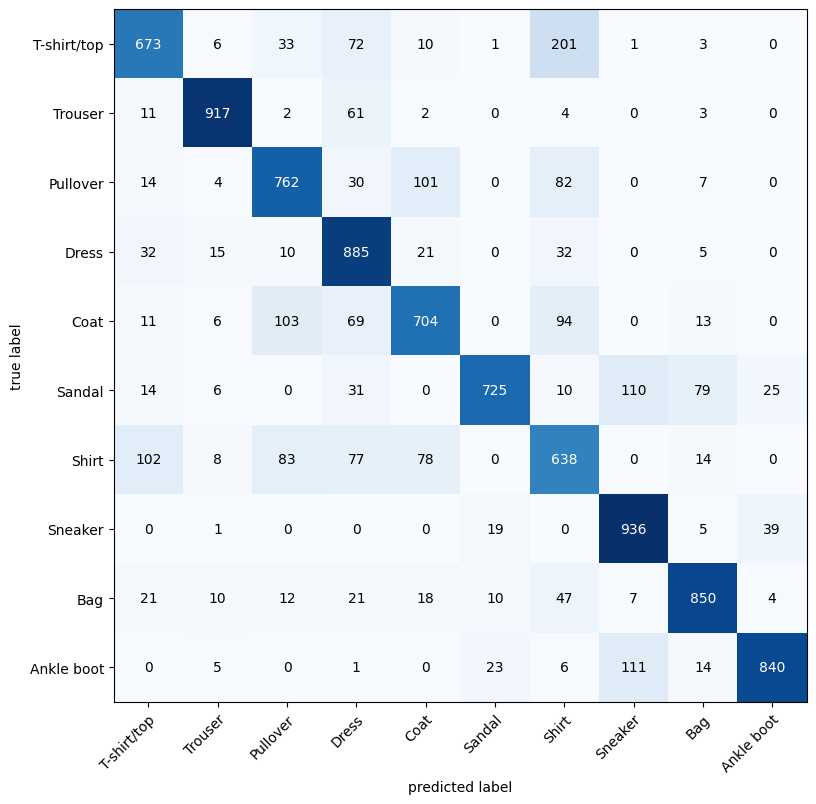

In [127]:
# Setup confusion instance and compare predicitons to targets
confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.cpu().numpy(),
    class_names=class_names,
    figsize=(9,9)
)

In [128]:
confmat_tensor

tensor([[673,   6,  33,  72,  10,   1, 201,   1,   3,   0],
        [ 11, 917,   2,  61,   2,   0,   4,   0,   3,   0],
        [ 14,   4, 762,  30, 101,   0,  82,   0,   7,   0],
        [ 32,  15,  10, 885,  21,   0,  32,   0,   5,   0],
        [ 11,   6, 103,  69, 704,   0,  94,   0,  13,   0],
        [ 14,   6,   0,  31,   0, 725,  10, 110,  79,  25],
        [102,   8,  83,  77,  78,   0, 638,   0,  14,   0],
        [  0,   1,   0,   0,   0,  19,   0, 936,   5,  39],
        [ 21,  10,  12,  21,  18,  10,  47,   7, 850,   4],
        [  0,   5,   0,   1,   0,  23,   6, 111,  14, 840]])

#### Save and load best performing model

In [129]:

from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                exist_ok=True)

# Create model save path

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model's state dict
print(f"Savig the model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
        f=MODEL_SAVE_PATH)


Savig the model to : models/03_pytorch_computer_vision_model_2.pth


In [130]:
# Loading the saved model
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names))

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [131]:
model_2_results

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0, 'model_acc': 88.8878}

In [132]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device,
                                    accuracy_fn=accuracy_fn)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0, 'model_acc': 88.8878}

In [133]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
                torch.tensor(loaded_model_2_results["model_loss"]),
                atol=1e-02)

tensor(True)